In [4]:
# Outlier detection examples

# Example1: assume data follow a normal distribution
# Cut off data points in low probability regions

import statistics

data = [23.0, 28.8, 28.9, 28.9, 28.9, 29.0, 29.1, 29.1, 29.2, 29.2, 29.3, 29.4, 29.5, 
        29.5, 29.6, 29.7, 29.7, 29.8, 29.8, 29.9, 29.9, 35.0]


def find_outliers_normal_dist(data):
    outliers = []
    # Set upper and lower limit to 3 standard deviation
    data_std = statistics.stdev(data)
    data_mean = statistics.mean(data)
    cut_off = data_std * 3
    lower_limit  = data_mean - cut_off 
    upper_limit = data_mean + cut_off
    print(f'Lower limit: {lower_limit}')
    print(f'Upper limit: {upper_limit}')
    for d in data:
        if d > upper_limit or d < lower_limit:
            outliers.append(d)
    return outliers

outliers = find_outliers_normal_dist(data)
outliers

Lower limit: 23.665232344274628
Upper limit: 34.98931311027083


[23.0, 35.0]

<AxesSubplot:>

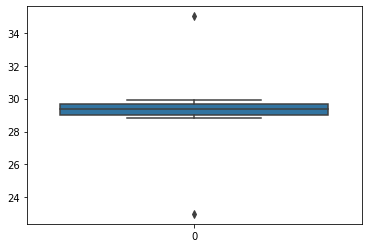

In [5]:
# Example2: Use boxplots to locate outliers
# Similar idea as with the normal distribution. 
# Boxplots calculate the IQR
# Outliers: below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)


In [6]:
from numpy import percentile

def find_outliers_iqr(data):
    outliers = []
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print(f'Percentiles: 25th={q25}, 75th={q75}, IQR={iqr}')
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    return outliers

outliers = find_outliers_normal_dist(data)
outliers


Lower limit: 23.665232344274628
Upper limit: 34.98931311027083


[23.0, 35.0]

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

X = [
    [23.0,0],
    [28.8,0],
    [28.9,0],
    [28.9,0],
    [28.9,0],
    [29.0,0],
    [29.1,0],
    [29.1,0],
    [29.2,0],
    [29.2,0],
    [29.3,0],
    [29.4,0],
    [29.5,0],
    [29.5,0],
    [29.6,0],
    [29.7,0],
    [29.7,0],
    [29.8,0],
    [29.8,0],
    [29.9,0],
    [29.9,0],
    [35.0,0]
]

outlier_detection = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
clusters = outlier_detection.fit_predict(X)
list(clusters)


In [ ]:
import matplotlib.pyplot as plt

cl1=[point[0] for i,point in enumerate(X) if clusters[i]==0]
cl2=[point[0] for i,point in enumerate(X) if clusters[i]==-1]
y1=[0 for i in cl1]
y2=[0 for i in cl2]
#plt.scatter(cl1,y1,c='lightblue',marker='o',s=40,label='cluster 1')
#plt.scatter(cl2,y2,c='red',marker='s',s=40,label='outliers')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()